# Install kaggle

In [15]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
! cp kaggle.json ~/.kaggle/

Perlu melakukan upload API token yang didapatkan pada page profile di kaggle kemudian di upload ke drive, baris code diatas akan melakukan mount terhadap file json untuk autentikasi

In [18]:
! chmod 600 ~/.kaggle/kaggle.json

Melakukan penginstallan dependensi yang diperlukan untuk mengakses data dari kaggle pada VM yang disediakan.

# Download Datasets

In [19]:
! kaggle datasets download alexteboul/diabetes-health-indicators-dataset

 83% 5.00M/6.03M [00:01<00:00, 3.74MB/s]
100% 6.03M/6.03M [00:01<00:00, 4.50MB/s]


Mengunduh dataset yang akan digunakan untuk project ini yaitu dataset yang berkaitan dengan indikator penyakit diabetes

In [20]:
! unzip diabetes-health-indicators-dataset

Archive:  diabetes-health-indicators-dataset.zip
  inflating: diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_health_indicators_BRFSS2015.csv  


Digunakan untuk melakukan unzip terhadap file apabila file yang diunduh masih berbentuk zip

# Import library dan data loading (Dataset dan Sample data)

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Melakukan import-import library dasar yang akan digunakan untuk project, menggunakan pandas untuk melakukan proses analisis data, seaborn untuk visualisasi data dan matplotlib digunakan matplotlib untuk membantu visualisasi juga.

In [22]:
path = "diabetes_binary_health_indicators_BRFSS2015.csv"
df = pd.read_csv(path)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Melakukan loading data menggunakan fungsi read_csv yang berguna untuk melakukan loading data dari file dengan format csv kedalam variabel dengan tipe dataframe

In [23]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Mengecek apakah data sudah muat dengan baik atau belum dengan fungsi head() yang berguna untuk menampilkan secara default 5 data teratas dari df, jika ingin mengurangi atau menambah data yang ingin ditampilkan dapat memasukan bilangan integer dalam kurung sebagai parameter. Sample data set dapat dilihat disini

# Satuan perhitungan data (Tipe data, penjelasan data set)

Perlu diketahui bahwa data disajikan dalam bilangan biner di mana

Diabetes_binary :
0 = no diabetes  1 = diabetes

HighBP :
0 = no high BP 1 = high BP

HighChol :
0 = no high cholesterol 1 = high cholesterol

CholCheck :
0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

BMI :
Body Mass Index

Smoker :
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

Stroke :
(Ever told) you had a stroke. 0 = no 1 = yes

HeartDiseaseorAttack :
coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

PhysActivity :
physical activity in past 30 days - not including job 0 = no 1 = yes

Fruits :
Consume Fruit 1 or more times per day 0 = no 1 = yes

Veggies :
Consume Vegetables 1 or more times per day 0 = no 1 = yes

HvyAlcoholConsump :
(adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes

AnyHealthcare :
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

NoDocbcCost :
Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

GenHlth :
Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

MentHlth :
days of poor mental health scale 1-30 days

PhysHlth :
physical illness or injury days in past 30 days scale 1-30

DiffWalk :
Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

Sex :
0 = female 1 = male

Age :
13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

Education :
Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = elementary etc.

Income :
Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

# Perhitungan data penderita diabetes dan orang sehat (Proses Data dan Visualisasi Data)

In [ ]:
df = df.loc[:, ['Diabetes_binary', 'HighBP','HighChol', 'BMI', 'Smoker','HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'PhysHlth','Sex','Age']]
diabet = len(df[df.Diabetes_binary == 1])
sehat = len(df[df.Diabetes_binary == 0])
print("Persentase orang sehat: {:.2f}%".format((sehat / (len(df.Diabetes_binary))*100)))
print("Persentase orang yang menderita diabetes: {:.2f}%".format((diabet / (len(df.Diabetes_binary))*100)))

Persentase orang sehat: 86.07%
Persentase orang yang menderita diabetes: 13.93%


Block code ini digunakan untuk menghitung data orang yang menderita diabetes dan yang tidak terkena diabetes, kita dapat mencari rata-rata faktor yang mempengaruhi seseorang menderita diabetes dan mengeluarkan kolom-kolom yang tidak diperlukan dalam analisis seperti AnyHealthcare (tentang kepemilikan asuransi), NoDocbcCost(kesulitan untuk konsultasi dengan dokter), Education, dan income

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


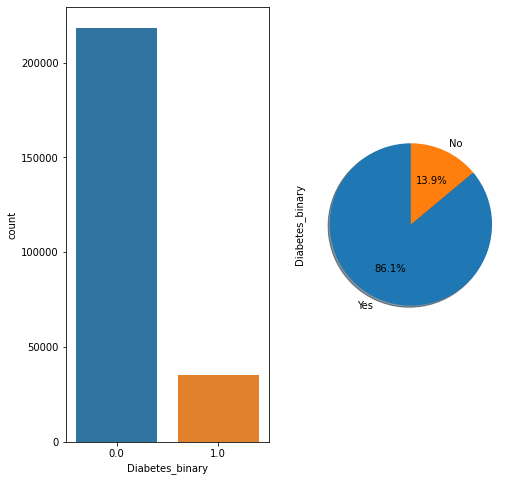

In [ ]:
fig1, ax1 = plt.subplots(1,2,figsize=(8,8))
sns.countplot(df.Diabetes_binary, ax=ax1[0])
labels = 'Yes','No'
df.Diabetes_binary.value_counts().plot.pie(labels = labels, autopct='%1.1f%%',shadow=True, startangle=90)

Visualisasi dari distribusi penderita dan non-penderita diabetes

# Hubungan Age (umur) dengan Penyakit diabetes (Proses Data dan Visualisasi Data)

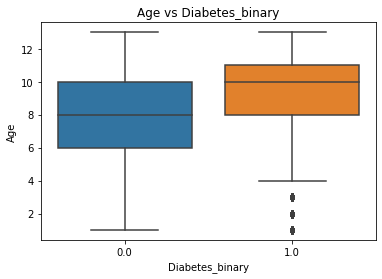

In [ ]:
sns.boxplot(x = 'Diabetes_binary', y = 'Age', data = df)
plt.title('Age vs Diabetes_binary')
plt.show()

Disini kita dapat melihat bahwa median dari penderita diabetes lebih tinggi daripada orang yang tidak menderita diabetes di mana artinya diabetes lebih rawan diderita oleh orang yang lebih tua

In [ ]:
pd.crosstab(df["Diabetes_binary"], df["Age"])

Age,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Diabetes_binary,,,,,,,,,,,,,
0.0,5622,7458,10809,13197,15106,18077,23226,26569,27511,25636,18392,12577,14154
1.0,78,140,314,626,1051,1742,3088,4263,5733,6558,5141,3403,3209


Di atas adalah distribusi penderita diabetes pada 13 level age category, fungsi crosstab digunakan untuk menunjukan relasi 2 atau lebih variable antar 2 table

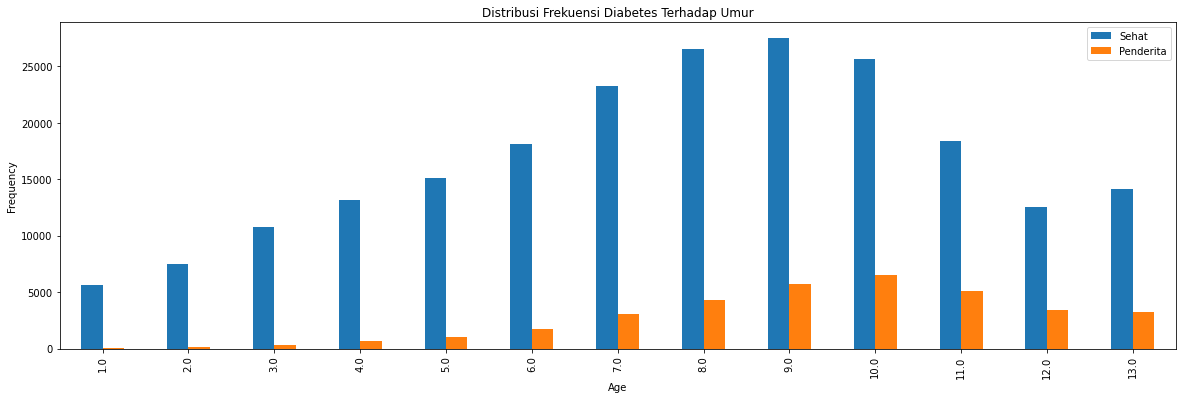

In [ ]:
pd.crosstab(df.Age,df.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Distribusi Frekuensi Diabetes Terhadap Umur')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Sehat", "Penderita"])
plt.show()

Visualisasi distribusi umur penderita diabetes, dapat dilihat bahwa penderita diabetes semakin meningkat seiring umur bertambah

# Hubungan Smoker (Frekuensi Merokok) dengan Penyakit (Proses Data dan Visualisasi Data)

In [ ]:
pd.crosstab(df.Smoker, df.Diabetes_binary)

Diabetes_binary,0.0,1.0
Smoker,,
0.0,124228,17029
1.0,94106,18317


Di atas merupakan distribusi dari penderita diabetes dan orang sehat dengan hubungannya terhadap kegiatan merokok, terlihat bahwa orang dengan diabetes lebih mungkin merokok karena jumlah penderita yang merokok lebih besar daripada penderita yang tidak merokok

Text(0.5, 1.0, 'Distribusi Frekuensi Diabetes Terhadap Perokok')

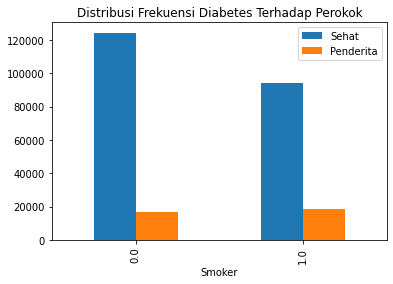

In [ ]:
pd.crosstab(df.Smoker, df.Diabetes_binary).plot(kind = 'bar')
plt.legend(["Sehat", "Penderita"])
plt.title("Distribusi Frekuensi Diabetes Terhadap Perokok")

Di atas merupakan visualisasi dari distribusi perokok yang tidak menderita dan menderita diabetes

# Hubungan Antara Sex (Jenis Kelamin) dengan Penyakit Diabetes (Proses Data dan Visualisasi Data)

In [ ]:
pd.crosstab(df.Sex,df.Diabetes_binary)

Diabetes_binary,0.0,1.0
Sex,,
0.0,123563,18411
1.0,94771,16935


Berdasarkan hubungan antara jenis kelamin dan penyakit diabetes, wanita lebih rawan terkena diabtes namun wanita juga lebih sehat dibanding kan pria, namun hal ini bisa saja terjadi karena jumlah wanita dan pria yang ikut survey berbeda 

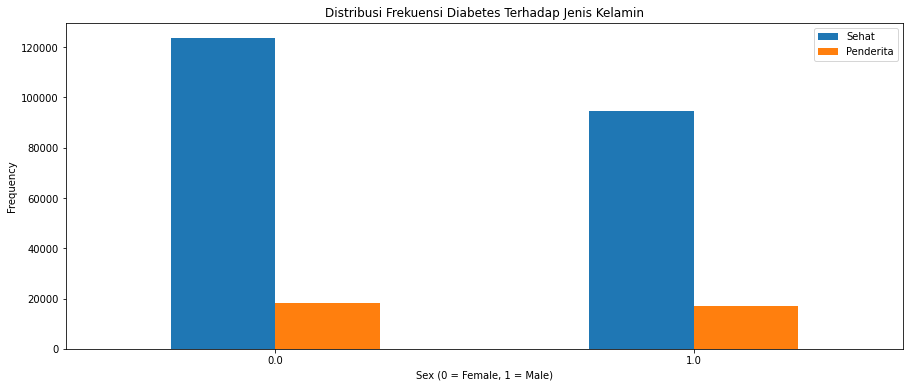

In [ ]:
pd.crosstab(df.Sex,df.Diabetes_binary).plot(kind="bar",figsize=(15,6))
plt.title('Distribusi Frekuensi Diabetes Terhadap Jenis Kelamin')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Sehat", "Penderita"])
plt.ylabel('Frequency')
plt.show()

Di atas merupakan visualisasi dari distribusi jenis kelamin yang tidak menderita dan menderita diabetes

# Hubungan Antara HighBP (tekanan darah tinggi) dengan Penyakit Diabetes (Proses Data dan Visualisasi Data)

In [ ]:
pd.crosstab(df.HighBP,df.Diabetes_binary)

Diabetes_binary,0.0,1.0
HighBP,,
0.0,136109,8742
1.0,82225,26604


Pada penggabungan kedua hubungan ini dapat dilihat bahwa kebanyakan dari penderita diabetes memiliki tekanan darah tinggi.

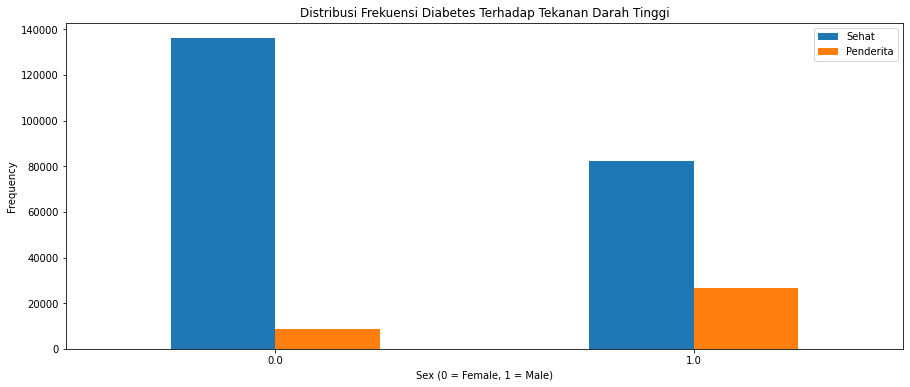

In [ ]:
pd.crosstab(df.HighBP,df.Diabetes_binary).plot(kind="bar",figsize=(15,6))
plt.title('Distribusi Frekuensi Diabetes Terhadap Tekanan Darah Tinggi')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Sehat", "Penderita"])
plt.ylabel('Frequency')
plt.show()

Di atas merupakan visualisasi dari distribusi hubungan antara tekanan darah tinggi dengan penderita diabetes

# Hubungan HighChol (Kolesterol) dengan Penyakit Diabetes (Proses Data dan Visualisasi Data)

In [ ]:
pd.crosstab(df.HighChol,df.Diabetes_binary)

Diabetes_binary,0.0,1.0
HighChol,,
0.0,134429,11660
1.0,83905,23686


Dapat dilihat bahwa orang yang memiliki kolesterol tinggi lebih rawan untuk terkena diabetes

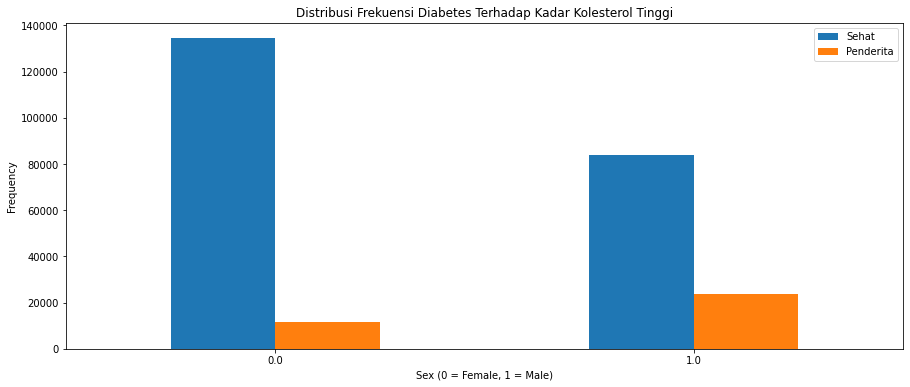

In [ ]:
pd.crosstab(df.HighChol,df.Diabetes_binary).plot(kind="bar",figsize=(15,6))
plt.title('Distribusi Frekuensi Diabetes Terhadap Kadar Kolesterol Tinggi')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Sehat", "Penderita"])
plt.ylabel('Frequency')
plt.show()

Visualisasi distribusi frekuensi penderita terhadap HighChol (kadar kolesterol tinggi)

# Hubungan BMI (Indeks Massa Tubuh) dengan Penyakit Diabetes (Proses Data dan Visualisasi Data)

In [ ]:
pd.crosstab(df.BMI,df.Diabetes_binary)

Diabetes_binary,0.0,1.0
BMI,,
12.0,6,0
13.0,19,2
14.0,37,4
15.0,120,12
16.0,328,20
...,...,...
91.0,1,0
92.0,27,5
95.0,11,1


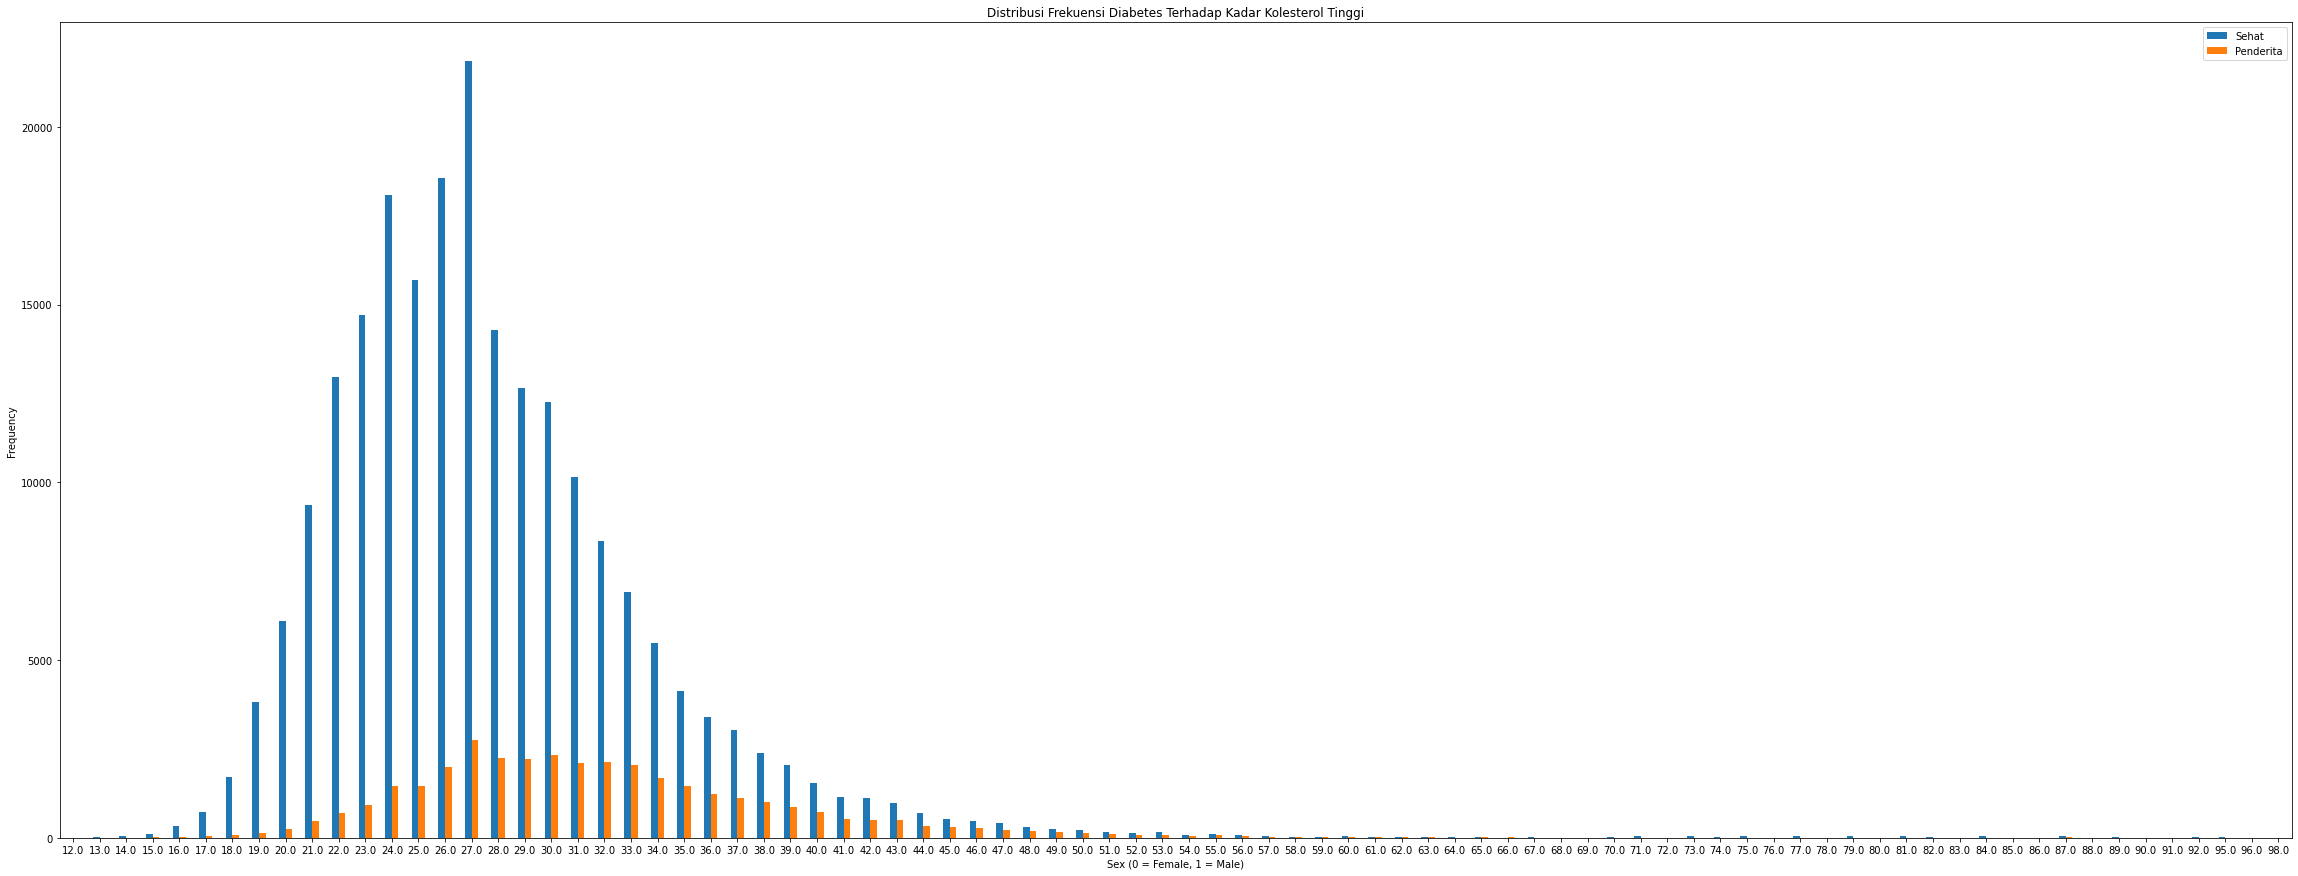

In [ ]:
pd.crosstab(df.BMI,df.Diabetes_binary).plot(kind="bar",figsize=(40,15))
plt.title('Distribusi Frekuensi Diabetes Terhadap Kadar Kolesterol Tinggi')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Sehat", "Penderita"])
plt.ylabel('Frequency')
plt.show()

Dapat dilihat dari visualisasi distribusi BMI terhadap penderita diabetes, orang dengan BMI 24 - 35 memiliki kemungkinan lebih besar untuk menderita diabetes

# Predictive Analysis (Proses Data)

Pada dataset ini, kami ingin menggunakan Random Forest Regressor untuk membuat model prediksi yang berguna untuk memprediksi seseorang yang mengisi survey menderita diabetes atau tidak melalui beberapa faktor yang telah kami cari hubungannya dengan penyakit diabetes sebelumnya.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

Di atas merupakan import dari library yang akan kami gunakan pada tahap ini, yaitu train_test_split yang berguna untuk mengsplit data menjadi data training yang berguna untuk melakukan training terhadap Random Forest Regressor untuk meningkatkan akurasi prediksi dari Random Forest Regressor dan data validasi yang akan digunakan untuk mengvalidasi hasil prediksi dari Random Forest Regressor yang telah dilatih dengan data training.

Lalu ada mean_absolute_error yang digunakan untuk mengetahui simpangan kesalahan dari prediksi Random Forest pada data validasi.

In [ ]:
y = df.Diabetes_binary
features = ['Age', 'Smoker', 'Sex', 'HighBP', 'HighChol', 'BMI']
X = df[features]

Pada bagian ini kami menentukan faktor apa saja yang dipilih sebagai faktor yang mempengaruhi potensi seseorang dapat menderita diabetes

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

Melakukan spliting data set untuk digunakan, rasio yang digunakan adalah 75% data untuk training dan 25% untuk testing/validasi

In [ ]:
forest_model = RandomForestRegressor(random_state=0)
forest_model.fit(train_X, train_y)

RandomForestRegressor(random_state=0)

Menginisialisasi model prediktif yang akan dibuat, pada analisis ini kami menggunakan Random Forest untuk memprediksi seseorang menderita diabetes atau tidak dari umur, kebiasaan merokok, jenis kelamin, tekanan darah, kadar kolestrol dan BMI.

Disini juga dilakukan training model yang akan kami gunakan dengan data training yang didapat pada splitting sebelumnya

In [ ]:
diabet_predict = forest_model.predict(val_X)
print(mean_absolute_error(val_y, diabet_predict))

0.2054869780603688


Setelah model dilatih, akan dilakukan pengujian model dengan dataset validasi untuk melihat apakah model yang telah dilatih dapat memprediksi hasil dari dataset validasi secara tepat.

Disini dapat dilihat bahwa terdapat rata-rata error sebesar 0,205.